**Fetching** **Data**

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784')

In [3]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [5]:
x=mnist['data']
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
y=mnist['target']
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
x.shape

(70000, 784)

In [8]:
y.shape

(70000,)

**visualization**

In [9]:
%matplotlib inline

In [10]:
import matplotlib
import matplotlib.pyplot as plt


In [11]:
some_digit= x[37000]
some_digit_image=some_digit.reshape(28,28)

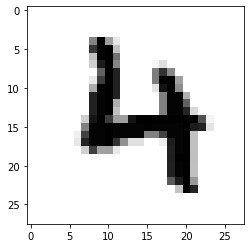

In [12]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")

In [13]:
y[37000]

'4'

**Training** **and** **Testing**

In [14]:
x_train,x_test= x[:60000],x[60000:]

In [15]:
y_train,y_test= y[:60000],y[60000:]

In [16]:
import numpy as np
shuffle_index=np.random.permutation(60000)
x_train,y_train=x_train[shuffle_index],y_train[shuffle_index]

**classification**

In [17]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_4=(y_train==4)
y_test_4=(y_test==4)

In [18]:
y_train_4

array([False,  True, False, ..., False, False, False])

In [19]:
y_test_4

array([False, False, False, ...,  True, False, False])

In [20]:
y_train

array([6, 4, 1, ..., 6, 8, 2], dtype=int8)

**Predict**

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
clf=LogisticRegression(tol=0.1)

In [23]:
clf.fit(x_train,y_train_4)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [24]:
clf.predict([some_digit])

array([ True])

**Accuracy**

In [26]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf,x_train,y_train_4,cv=3,scoring="accuracy")
a

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.98205, 0.98295, 0.98125])

In [27]:
a.mean()

0.9820833333333333